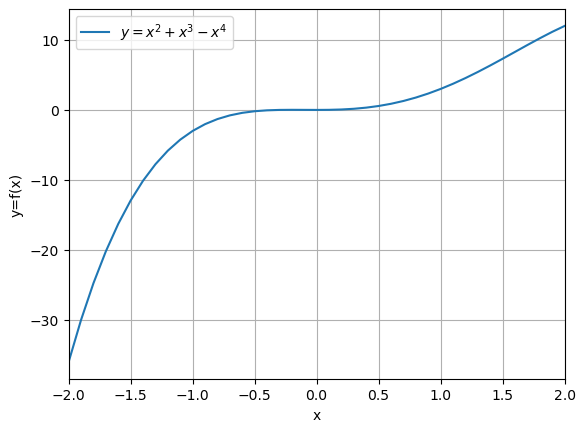

In [17]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

######### PLOT A FUNCTION ###########

# define domains of the function (range of the input)
xDomain = [ -2, 2 ]

# you can use arange in numpty to generate this range (we need a grid of x axis values)
x = np.arange(xDomain[0], xDomain[1]) # [-2,-1,0,1] before resolution
# use a resolution to make the steps different
resolution = .1
x = np.arange(xDomain[0], xDomain[1]+resolution, resolution)
# note that the ending value is something minus the step size (resolution) and not actually 2 - arange is inclusive in lower bound and exclusive in upper bound
  # so we add the resolution (step size) to the last value to get the domain to include that value


# alternatively to create the domain, you can use linspace to crate linearly spaced numbers
howmany = 41 # it helps to specify an odd number of values so that you get exact 0 in the set and in the center, otherwise you might not get 0 in the set
x = np.linspace(xDomain[0], xDomain[1], howmany)


# define a function to plot: (x^2 + 3x^3 - x^4)
y = x**2 + 3*x**3 - x**4 # because x is a numpy data grid, this function will run for each x in that set, and y will be a resulting set

plt.plot(x,y,label='$y=x^2+x^3-x^4$') # pass in label for what to show on the legend, use latex formatting
plt.legend() # you need to call this to show the legend with label above
plt.grid()
# zoom in and remove the whitespace on left and right of the graph line, so the line on either end goes to the end of the graph
plt.xlim(xDomain[0], xDomain[1])
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

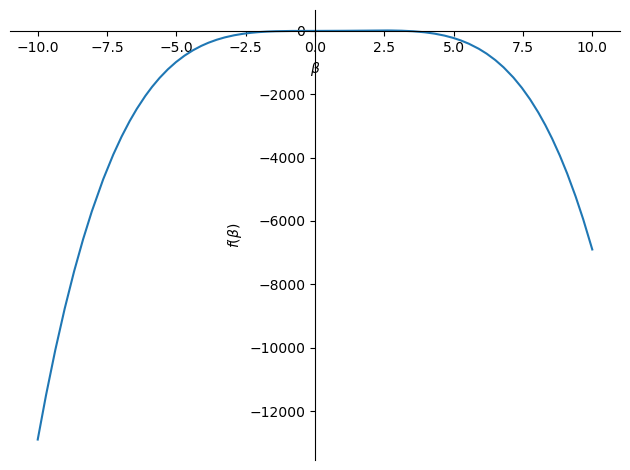

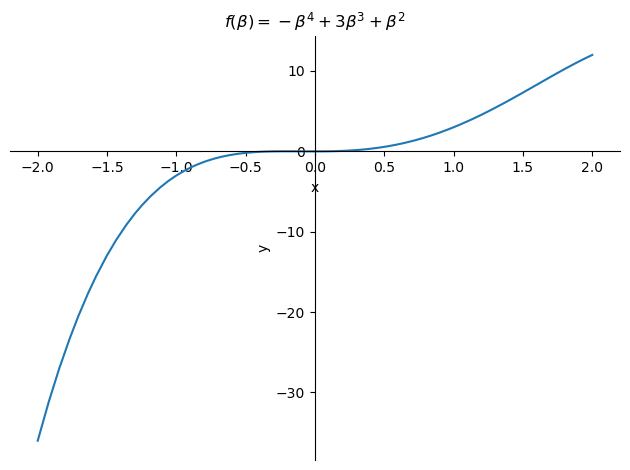

In [30]:
########### USING SYMPY ################


# create a symbolic variable using sympy library
  # a symbolic variable represents how you would write it out in a math formula on the chalkboard, etc. the beta is the beta greek symbol
s_beta = sym.var('beta') 

# define the function to plot
s_y = s_beta**2 + 3*s_beta**3 - s_beta**4 # note this does not work on numerical ranges specified for beta (unlike with our numpy example)

# you can use sympy to plot the sympy object and sympy will choose an arbitrary domain if not specified
sym.plot(s_y)

# specify the boundaries of the plotting with a tuple (variable, lower bound, upper bound)
sym.plot(
    s_y, 
    (s_beta, xDomain[0], xDomain[1]), 
    xlabel="x", 
    ylabel="y",
    title=f'$f(\\beta) = {sym.latex(s_y)}$' # you can just pass in the sym function for the title and format it to latex (surround with $ in f string)
) # you can pass in None to labels to get rid of them if desired

# Note that the sympy plotting engine can be limited compared to matplotlib. Often you will convert from sympy to numpy to plot the function

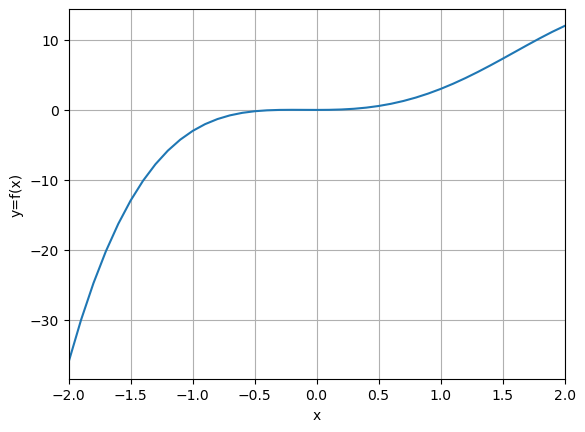

In [35]:
########### CONVERT SYMPY IMPL TO NUMPY #################

# sometimes you want to do this to get better plotting functionality or other reasons

# use lambdify from sympy to turn the symbolic variable/expression into a function
fx = sym.lambdify(s_beta, s_y) # pass in the variable and the expression/function using the symbolic var

# fx is now a function that you can input the variable (s_beta) into and get an output of y
yy = fx(x) # use the numpy x from exercise 1

plt.plot(x,yy)
plt.grid()
# zoom in and remove the whitespace on left and right of the graph line, so the line on either end goes to the end of the graph
plt.xlim(xDomain[0], xDomain[1])
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()